In [1]:
import polars as pl

In [2]:
s = pl.Series('col', [1, 2, 3, 4, 5])

In [3]:
s.head()

col
i64
1
2
3
4
5


In [4]:
data = {'a': [1, 2, 3], 'b': [4, 5, 6]}

In [5]:
s_a = (pl.DataFrame(data).to_series())

In [6]:
s_a.head()

a
i64
1
2
3


In [7]:
s_a = (pl.DataFrame(data).to_series(1))

In [8]:
s_a.head()

b
i64
4
5
6


In [9]:
s_b2 = (pl.DataFrame(data).get_column('b'))

In [10]:
s_b2.head()

b
i64
4
5
6


In [11]:
s_b2.shape

(3,)

In [12]:
s_b2.name

'b'

In [13]:
s_b2.dtype

Int64

In [14]:
data = {'name': ['Sarah', 'Mike', 'Bob', 'Ashley']}

In [15]:
lf = pl.LazyFrame(data)

In [16]:
type(lf)

polars.lazyframe.frame.LazyFrame

In [17]:
lf.collect().head()

name
str
"""Sarah"""
"""Mike"""
"""Bob"""
"""Ashley"""


In [18]:
lf.collect_schema()

Schema([('name', String)])

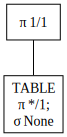

In [20]:
(lf.select(pl.col('name')).show_graph(optimized=False))

In [21]:
(lf.select(pl.col('name')).explain())

'DF ["name"]; PROJECT 1/1 COLUMNS; SELECTION: None'

In [22]:
df = pl.read_csv('../data/titanic_dataset.csv')

In [23]:
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [25]:
df.select(['Survived', 'Ticket', 'Fare']).head()

Survived,Ticket,Fare
i64,str,f64
0,"""A/5 21171""",7.25
1,"""PC 17599""",71.2833
1,"""STON/O2. 3101282""",7.925
1,"""113803""",53.1
0,"""373450""",8.05


In [26]:
df.select(pl.col(['Survived', 'Ticket', 'Fare'])).head()

Survived,Ticket,Fare
i64,str,f64
0,"""A/5 21171""",7.25
1,"""PC 17599""",71.2833
1,"""STON/O2. 3101282""",7.925
1,"""113803""",53.1
0,"""373450""",8.05


In [27]:
df.select(
    pl.col('Survived'),
    pl.col('Ticket'),
    pl.col('Fare'),
).head()

Survived,Ticket,Fare
i64,str,f64
0,"""A/5 21171""",7.25
1,"""PC 17599""",71.2833
1,"""STON/O2. 3101282""",7.925
1,"""113803""",53.1
0,"""373450""",8.05


In [29]:
df.with_columns(pl.lit(1).alias('num')).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,num
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,i32
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",1
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",1
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""",1
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",1
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""",1


In [32]:
df.filter((pl.col('Age') >= 30) & (pl.col('Sex') == 'female')).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
12,1,1,"""Bonnell, Miss. Elizabeth""","""female""",58.0,0,0,"""113783""",26.55,"""C103""","""S"""
16,1,2,"""Hewlett, Mrs. (Mary D Kingcome…","""female""",55.0,0,0,"""248706""",16.0,null,"""S"""
19,0,3,"""Vander Planke, Mrs. Julius (Em…","""female""",31.0,1,0,"""345763""",18.0,null,"""S"""


In [33]:
df.select(pl.col('^[a-zA-Z]{0, 4}$')).head()

Name,Sex,Age,Fare
str,str,f64,f64
"""Braund, Mr. Owen Harris""","""male""",22.0,7.25
"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,71.2833
"""Heikkinen, Miss. Laina""","""female""",26.0,7.925
"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,53.1
"""Allen, Mr. William Henry""","""male""",35.0,8.05


In [35]:
df.select(pl.col(pl.String)).head()

Name,Sex,Ticket,Cabin,Embarked
str,str,str,str,str
"""Braund, Mr. Owen Harris""","""male""","""A/5 21171""",null,"""S"""
"""Cumings, Mrs. John Bradley (Fl…","""female""","""PC 17599""","""C85""","""C"""
"""Heikkinen, Miss. Laina""","""female""","""STON/O2. 3101282""",null,"""S"""
"""Futrelle, Mrs. Jacques Heath (…","""female""","""113803""","""C123""","""S"""
"""Allen, Mr. William Henry""","""male""","""373450""",null,"""S"""


In [36]:
import polars.selectors as cs

In [37]:
df.select(cs.numeric()).head()

PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
i64,i64,i64,f64,i64,i64,f64
1,0,3,22.0,1,0,7.25
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.925
4,1,1,35.0,1,0,53.1
5,0,3,35.0,0,0,8.05


In [38]:
df.select(cs.matches('se|ed')).head()

PassengerId,Survived,Embarked
i64,i64,str
1,0,"""S"""
2,1,"""C"""
3,1,"""S"""
4,1,"""S"""
5,0,"""S"""


In [40]:
df.with_columns(
    pl.col('Fare').max().alias('Max Fare'),
    max_fare=pl.col('Fare').max()
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Max Fare,max_fare
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,f64,f64
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",512.3292,512.3292
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",512.3292,512.3292
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""",512.3292,512.3292
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",512.3292,512.3292
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""",512.3292,512.3292


In [41]:
df.with_columns(
    (pl.col('Fare').max() - pl.col('Fare').mean()).alias('Max Fare - Avg Fare')
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Max Fare - Avg Fare
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,f64
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",480.124992
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",480.124992
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""",480.124992
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",480.124992
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""",480.124992


In [42]:
df.with_columns(pl.lit('Titanic')).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,literal
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""","""Titanic"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""","""Titanic"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""","""Titanic"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""","""Titanic"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""","""Titanic"""


In [43]:
df.with_row_index().head()

index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
u32,i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
0,1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
1,2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
2,3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
3,4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
4,5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [44]:
df.with_columns(pl.col('Sex').str.to_titlecase()).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""Male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""Female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""Female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""Female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""Male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [45]:
df.drop(['Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']).head()

PassengerId,Survived,Sex,Age,Fare
i64,i64,str,f64,f64
1,0,"""male""",22.0,7.25
2,1,"""female""",38.0,71.2833
3,1,"""female""",26.0,7.925
4,1,"""female""",35.0,53.1
5,0,"""male""",35.0,8.05
